This notebook contains the EDA, data processing, and model building ideas for project __Churn Analysis__ which can be accessed at : [GitHub](https://github.com/d0r1h/Churn-Analysis)

DataSet used in this project, taken from a Hackathon and raw data can be found at [Hackerearth](https://www.hackerearth.com/problem/machine-learning/predict-the-churn-risk-rate-11-fb7a760d/)

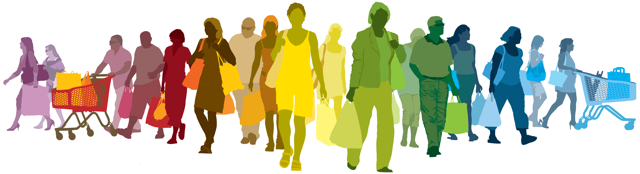

## Table of Contents

1. **[Problem Statement](#problem)**
2. **[Data Dictionary](#dictionary)**
3. **[Import Libraries](#import_lib)**
4. **[Exploratory Data Analysis](#data_preparation)**
    - 4.1 - [Data Dimension](#Data_Shape)
    - 4.2 - [Data Types](#Data_Types)
    - 4.3 - [Summary Statistics](#Summary_Statistics)
    - 4.4 - [Correlation](#correlation)
    - 4.5 - [Data Distribution](#dist)
        - 4.5.1 - [Data Distribution(Features)](#dist_feature)
        - 4.5.2 - [Data Distribution(Target)](#dist_target)
5. **[Data Pre-Processing](#data_pre)**
    - 5.1 - [Missing Values](#Missing_Values)
        - 5.1.1 - [Standard Missing Values](#S_Missing_Values)
        - 5.1.2 - [Non-Standard Missing Values](#NS_Missing_Values)
        - 5.1.3 - [Missing values imputation](#impute)
    - 5.2 - [Duplicate Data](#duplicate)
    - 5.3 - [Feature Engineering](#feature_eng)
    - 5.4 - [Outliers](#out)
        - 5.4.1 - [Discovery of Outliers](#dis_out)
        - 5.4.2 - [Visualizing outliers using Boxplots](#viz)
        - 5.4.3 - [Removal of Outliers](#rem_out)
    - 5.5 - [Categorical Data Encoding](#cat_enc)
    - 5.6 - [Feature Scaling](#fea_sca)
6. **[Model Evaluation](#eval)**
    - 6.1 - [Feature Selection using Random Forest](#fea_sel)
    - 6.2 - [Grid Search CV](#grid)
    - 6.3 - [Kfold Cross Validation](#kfold)
    - 6.4 - [Defining Functions](#fun)
        - 6.4.1 - [Confusion Matrix](#matrix)
        - 6.4.2 - [ROC Curve](#roc)
        - 6.4.3 - [Classification Report](#report)
        - 6.4.4 - [Accuracy](#accuracy)
        - 6.4.5 - [F1 Score](#f1) 
7. **[Model Building](#bui_mod)**
    - 7.1 - [Logistic Regression](#logreg)
    - 7.2 - [Naive Bayes](#bayes)
    - 7.3 - [K nearest neighbors (KNN)](#knn)
    - 7.4 - [Random Forest](#forest)
    - 7.5 - [AdaBoost](#adaboost)
    - 7.6 - [XGBoost](#xgboost)
8. **[Model Performance](#mod_per)**
9. **[Model Ensembling](#mod_opt)**
    - 9.1 - [Voting Classifier](#vote)
    - 9.2 - [Stacking Classifier](#stack)
10. **[Displaying Score Summary](#dis_sco_sum)**

# 1. Problem Statement <a id='problem'></a>

Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period.
Understanding and detecting churn is the first step to retaining these customers and improving the company’s offerings.

**Goal** is to predict the churn for a website based on the features provided in the dataset. **Customer will EXIT(1) or NOT(0)**, and identify customers who are likely to leave so that we can retain then with some special offers on membership.

# 2. Data Dictionary <a id='dictionary'></a>

1. **age**  Represents the age of a customer
2. **gender** Represents the gender of a customer
3. **security_no** 	Represents a unique security number that is used to identify a person
4. **region_category** 	Represents the region that a customer belongs to 
5. **membership_category** 	Represents the category of the membership that a customer is using
6. **joining_date** 	Represents the date when a customer became a member 
7. **joined_through_referral** 	Represents whether a customer joined using any referral code or ID
8. **referral_id 	Represents** a referral ID
9. **preferred_offer_types** 	Represents the type of offer that a customer prefers
10. **medium_of_operation** 	Represents the medium of operation that a customer uses for transactions
11. **internet_option** 	Represents the type of internet service a customer uses
12. **last_visit_time** 	Represents the last time a customer visited the website
13. **days_since_last_login** 	Represents the no. of days since a customer last logged into the website
14. **avg_time_spent** 	Represents the average time spent by a customer on the website
15. **avg_transaction_value** 	Represents the average transaction value of a customer
16. **avg_frequency_login_days** 	Represents the no. of times a customer has logged in to the website
17. **points_in_wallet** 	Represents the points awarded to a customer on each transaction 
18. **used_special_discount** 	Represents whether a customer uses special discounts offered
19. **offer_application_preference** 	Represents whether a customer prefers offers 
20. **past_complaint** 	Represents whether a customer has raised any complaints 
21. **complaint_status** 	Represents whether the complaints raised by a customer was resolved 
22. **feedback** 	Represents the feedback provided by a customer
23. **churn_risk_score** 0 or 1 [Customer will Stay or Exit]

# 3. Import Libraries <a id='import_lib'></a>

In [1]:
!pip install pydotplus -qq

In [2]:
import pydotplus
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz

from sklearn import tree
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, StackingClassifier



from xgboost import XGBClassifier
from sklearn.metrics import *

plt.rcParams['figure.figsize'] = [15,8]
from IPython.display import Image  

import warnings
warnings.filterwarnings('ignore')

# 4. Exploratory Data Analysis  <a id='data_preparation'></a>

In [3]:
data = pd.read_csv('../input/predict-the-churn-risk-rate/churn.csv', index_col=0)

In [4]:
data

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,...,300.630000,53005.25,17.0,781.750000,Yes,Yes,No,Not Applicable,Products always in Stock,0
1,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,...,306.340000,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,0
2,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,...,516.160000,21027.00,22.0,500.690000,No,Yes,Yes,Solved in Follow-up,Poor Website,1
3,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,...,53.270000,25239.56,6.0,567.660000,No,Yes,Yes,Unsolved,Poor Website,1
4,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,...,113.130000,24483.66,16.0,663.060000,No,Yes,Yes,Solved,Poor Website,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,46,F,6F51HFO,NaN,Basic Membership,2017-09-21,No,xxxxxxxx,Credit/Debit Card Offers,Desktop,...,-650.682759,27277.68,6.0,639.510000,No,Yes,Yes,No Information Available,No reason specified,1
36988,29,F,21KSM8Y,Town,Basic Membership,2016-06-27,No,xxxxxxxx,Without Offers,Smartphone,...,-638.123421,11069.71,28.0,527.990000,Yes,No,No,Not Applicable,Poor Customer Service,1
36989,23,F,XK1IM9H,NaN,Basic Membership,2016-09-11,Yes,CID3838,Gift Vouchers/Coupons,Desktop,...,154.940000,38127.56,Error,680.470000,No,Yes,Yes,Unsolved,Poor Website,1
36990,53,M,K6VTP1Z,Village,Platinum Membership,2017-06-15,No,xxxxxxxx,Gift Vouchers/Coupons,Smartphone,...,482.610000,2378.86,20.0,197.264414,Yes,Yes,No,Not Applicable,No reason specified,0


## 4.1 Data Dimensions <a id='Data_Shape'></a>

In [5]:
print(f'There are {data.shape[0]} data points and {data.shape[1]} features in the dataset')

There are 36992 data points and 23 features in the dataset


## 4.2 Data Types <a id='Data_Types'></a>

In [6]:
data.dtypes

age                               int64
gender                           object
security_no                      object
region_category                  object
membership_category              object
joining_date                     object
joined_through_referral          object
referral_id                      object
preferred_offer_types            object
medium_of_operation              object
internet_option                  object
last_visit_time                  object
days_since_last_login             int64
avg_time_spent                  float64
avg_transaction_value           float64
avg_frequency_login_days         object
points_in_wallet                float64
used_special_discount            object
offer_application_preference     object
past_complaint                   object
complaint_status                 object
feedback                         object
churn_risk_score                  int64
dtype: object

In [7]:
data.select_dtypes(include=[np.number]).head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.75,0
1,32,16,306.34,12838.38,NaN,0
2,44,14,516.16,21027.00,500.69,1
3,37,11,53.27,25239.56,567.66,1
4,31,20,113.13,24483.66,663.06,1


In [8]:
data.select_dtypes(include=['object']).head()

,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17.0,Yes,Yes,No,Not Applicable,Products always in Stock
1,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,10.0,Yes,No,Yes,Solved,Quality Customer Care
2,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,22.0,No,Yes,Yes,Solved in Follow-up,Poor Website
3,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,6.0,No,Yes,Yes,Unsolved,Poor Website
4,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,16.0,No,Yes,Yes,Solved,Poor Website


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                      There are 17 categorical variables and 6 numerical variables.
                     </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 4.3 Summary Statistics <a id='Summary_Statistics'></a>

In [9]:
data.describe(include=np.number)

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,0.540982
std,15.867412,228.819900,398.289149,19444.806226,194.063624,0.498324
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,0.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,0.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,1.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,1.000000


1. Average age of customers who is likely to exit is 37
2. On average customers have around 680 point in wallet
3. Maximum no. of days since a customer logged in is 26

In [10]:
data.describe(include='object')

,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
count,36992,36992,31564,36992,36992,36992,36992,36704,36992,36992,36992,36992,36992,36992,36992,36992,36992
unique,3,36992,3,6,1096,3,11359,3,4,3,30101,1654,2,2,2,5,9
top,F,XW0DQ7H,Town,Basic Membership,2015-06-02,No,xxxxxxxx,Gift Vouchers/Coupons,Desktop,Wi-Fi,07:56:41,Error,Yes,Yes,No,Not Applicable,Poor Product Quality
freq,18490,1,14128,7724,55,15839,17846,12349,13913,12413,6,3522,20342,20440,18602,18602,6350


1. Mostly customers are Females belongs to Town
2. Most customers uses Desktop to access website over wi-fi
3. Most of the customers have Basic Membership of the service

## 4.4 Correlation <a id='correlation'></a> 

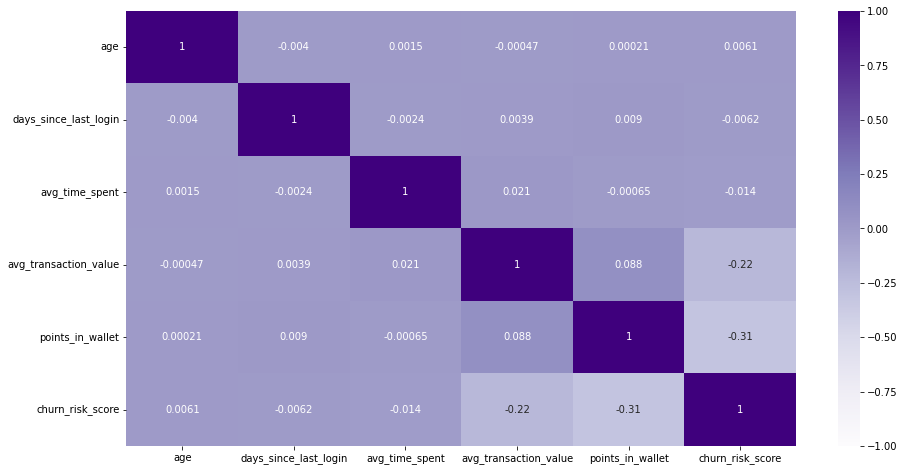

In [11]:
sns.heatmap(data.corr(), vmax=1, vmin=-1,cmap='Purples', annot=True)
plt.show()

1. There isn't high correlation between independent features and customer chrun 
2. Maximum -ve correlation between `point in wallet` and customer chrun is -0.31

## 4.5 Data Distribution <a id='dist'></a>

### 4.5.1 Data Distribution of Features <a id='dist_feature'></a>

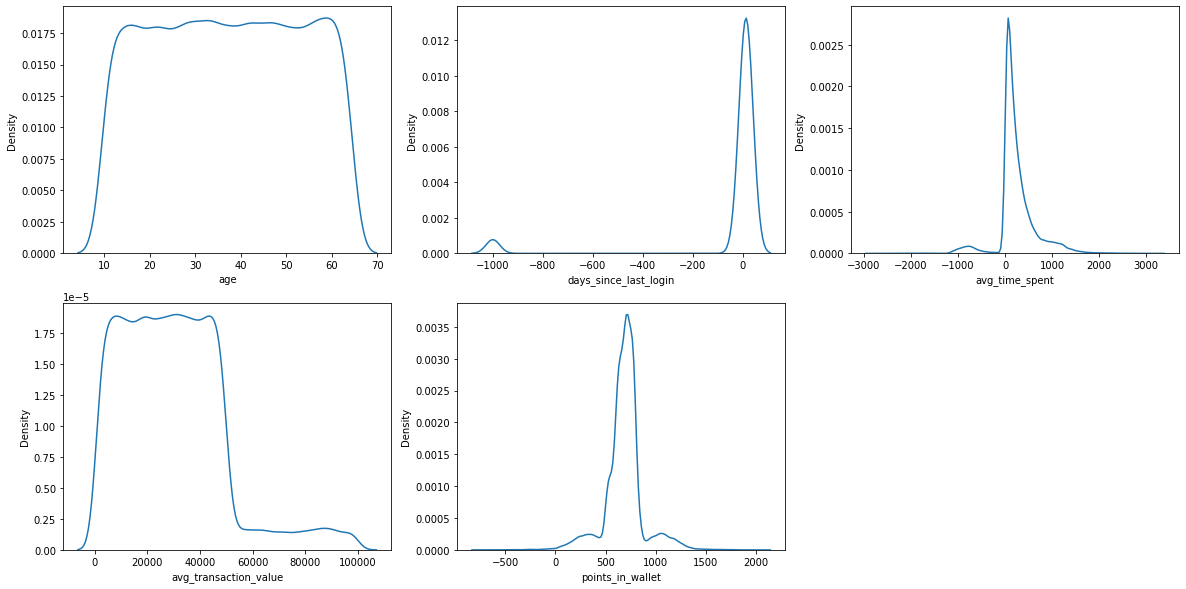

In [12]:
data_num=data.drop('churn_risk_score', axis=1).select_dtypes(include=[np.number]) 
fig,ax= plt.subplots(nrows=2,ncols=3,figsize=(20,10)) 
for variable, subplot in zip(data_num.columns,ax.flatten()):
    z = sns.kdeplot(x = data_num[variable] , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)

fig.delaxes(ax[1][2])
plt.show()

In [13]:
data_num.skew()

age                     -0.007319
days_since_last_login   -3.941356
avg_time_spent           0.539624
avg_transaction_value    1.011027
points_in_wallet        -0.080309
dtype: float64

1. As we can see from plot independent feature `days_since_last_login` is highly left skewed
2. Features such as `age` and  `points_in_wallet` are moderately left skewed

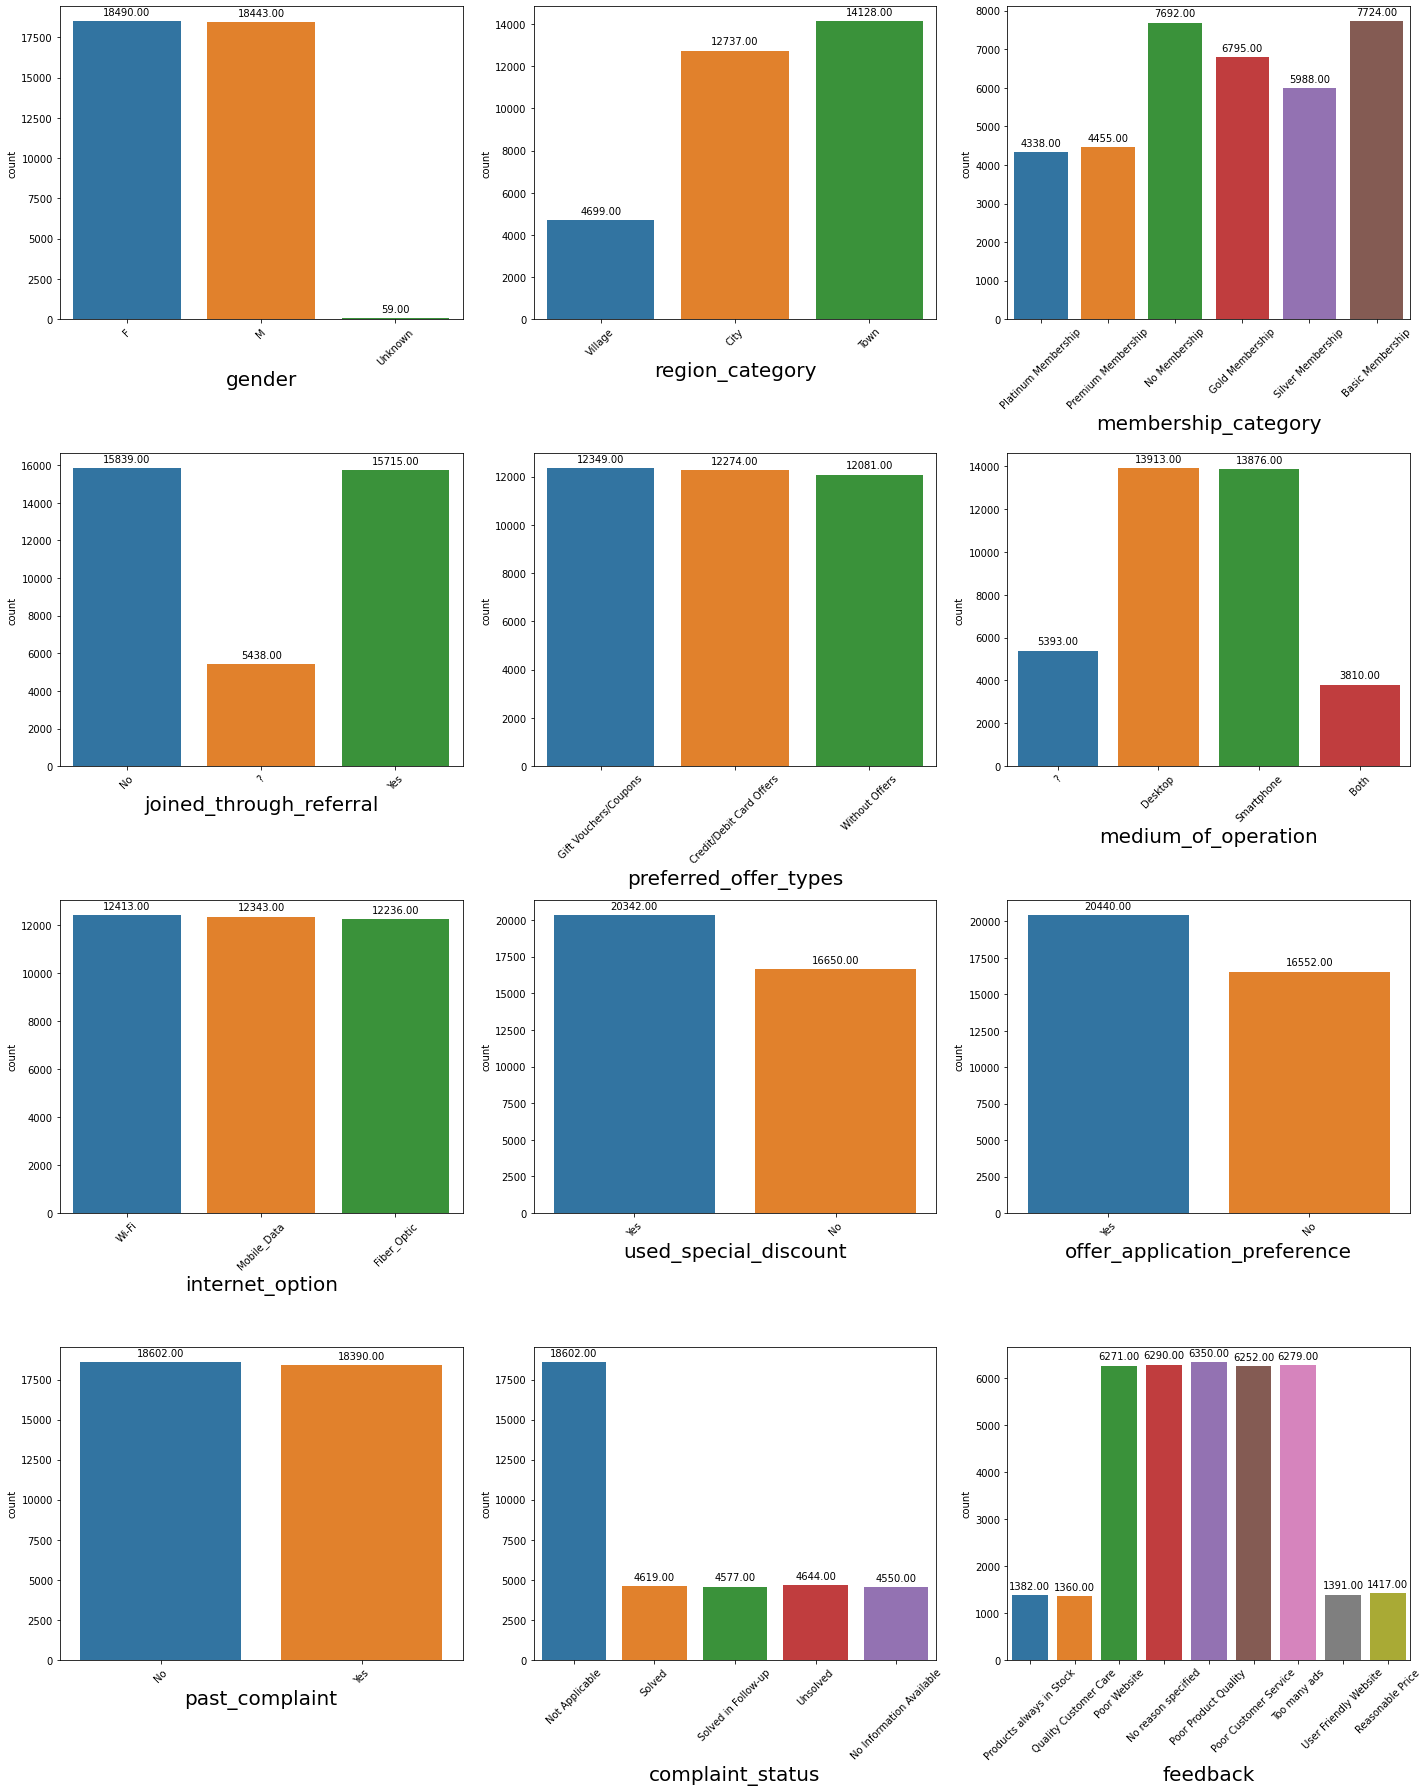

In [14]:
data_cat = data.drop(['referral_id','last_visit_time','avg_frequency_login_days','security_no','joining_date'], axis=1).select_dtypes(include='object')
fig,ax= plt.subplots(nrows=4,ncols=3,figsize=(20, 25)) 
for variable, subplot in zip(data_cat.columns,ax.flatten()):
    z = sns.countplot(x = data_cat[variable],ax=subplot, ) 
    z.set_xlabel(variable, fontsize = 20)
    z.set_xticklabels(z.get_xticklabels(),rotation=45)
    for p in z.patches:
      z.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
           xytext = (0, 6), textcoords = 'offset points')
    
plt.tight_layout()

1. As we can see both genders, `Male` and `Female` are equally distributed and there is some noise which will be handled in [Section 5.1.2](#NS_Missing_Values)
2. Most of the customers are from town region while least number of customer belongs to village whcih is ~4600. 
3. No & Basic category are leading one in `membership_category` while premium & platinum are least subscribed which is around ~4300+ 
4. Around 15K customers have joined through referral program
5. Most of the customers either use Desktop or Smartphone to access website
6. Most of the customers has given negative feedback about the service such as `poor website`, `poor customer service` etc.

### 4.5.2 Data Distribution of Target <a id='dist_target'></a>

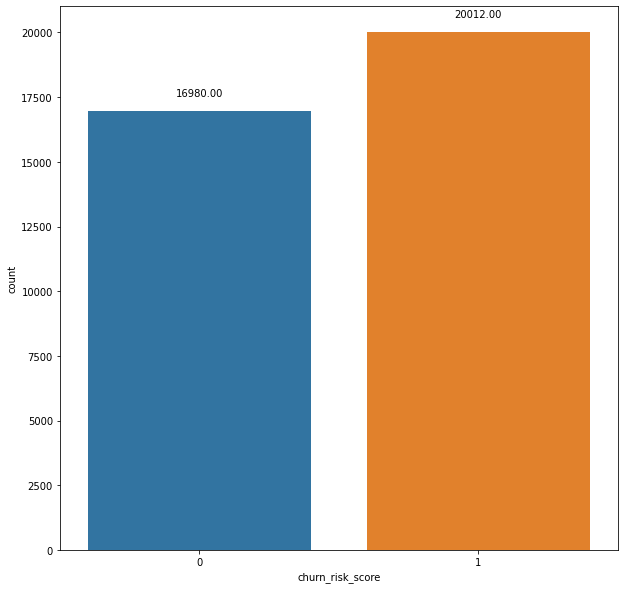

In [142]:
plt.rcParams['figure.figsize'] = [10,10] 
ax = sns.countplot(data['churn_risk_score'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2. , p.get_height()), ha = 'center',
           xytext = (0, 15), textcoords = 'offset points')
plt.show() 

Target feature **churn_risk_score**'s classes `Custimer will Exit (1)` and `Customer wont exit (0)` are kind of equally distributed by 5:4 ratio. 

# 5. Data Preprocessing   <a id='data_pre'></a>

## 5.1 Missing values <a id='Missing_Values'></a>

### 5.1.1 Standard Missing Values  <a id='S_Missing_Values'></a>

In [16]:
missing_values = pd.DataFrame({
    'missing_values':data.isnull().sum(),
    'percentage':data.isnull().sum()*100/data.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

,missing_values,percentage
region_category,5428,14.673443
points_in_wallet,3443,9.307418
preferred_offer_types,288,0.778547
age,0,0.000000
avg_time_spent,0,0.000000
feedback,0,0.000000
complaint_status,0,0.000000
past_complaint,0,0.000000
offer_application_preference,0,0.000000
used_special_discount,0,0.000000


Above datafram shows that missing values which are `NaN` values but there are some non-standard missing values which needs to be treated before further processing.

### 5.1.2 Non-Standard Missing Values <a id='NS_Missing_Values'></a>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
The non-standard missing values are replaced with NaN                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
data.joined_through_referral.value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                      The feature joined_through_referral has unindentified '?' values which are replaced with Nan.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>



In [18]:
data['joined_through_referral'] = data['joined_through_referral'].replace('?',np.NaN)

In [19]:
data.gender.value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature gender has unindentified 'Unknown' values which are replaced with Nan. 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:
data['gender'] = data['gender'].replace('Unknown',np.NaN)

In [21]:
data.referral_id.unique()

array(['xxxxxxxx', 'CID21329', 'CID12313', ..., 'CID60808', 'CID10431',
       'CID45477'], dtype=object)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature referral_id has unindentified 'xxxxxxxx' values which are replaced with Nan.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [22]:
data['referral_id'] = data['referral_id'].replace('xxxxxxxx',np.NaN)  

In [23]:
data.medium_of_operation.value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>    
The feature medium_of_operation has unindentified '?' values which are replaced with Nan. 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
data['medium_of_operation'] = data['medium_of_operation'].replace('?',np.NaN)  

In [25]:
data.days_since_last_login.value_counts()

 12     2380
 13     2373
 14     2307
 15     2278
 11     2262
 10     2091
 16     2068
-999    1999
 9      1863
 17     1747
 8      1571
 18     1444
 7      1442
 19     1308
 6      1257
 5      1234
 20     1184
 21     1015
 4       998
 22      895
 3       852
 23      727
 2       613
 24      471
 1       328
 25      203
 26       82
Name: days_since_last_login, dtype: int64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature days_since_last_login has unindentified '-999' values which are replaced with Nan. 
                   </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [26]:
data['days_since_last_login'] = data['days_since_last_login'].replace(-999,np.NaN)  

In [27]:
len(data[data.avg_time_spent < 0]['avg_time_spent'])

1719

In [28]:
data['avg_time_spent']=data['avg_time_spent'].apply(lambda x:x if x>=0 else np.nan)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature avg_time_spent has negative values which are replaced with Nan
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
len(data[data.points_in_wallet < 0]['points_in_wallet'])

136

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature points_in_wallet has negative values which are replaced with Nan
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [30]:
data['points_in_wallet']=data['points_in_wallet'].apply(lambda x:x if x>=0 else np.nan)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        The feature avg_frequency_login_days has negative values as well as unidentified 'Error' values which are replaced with Nan
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
data['avg_frequency_login_days']=data['avg_frequency_login_days'].apply(lambda x:x if x!='Error' else -1)
data['avg_frequency_login_days']=data['avg_frequency_login_days'].astype('float')
data['avg_frequency_login_days']=data['avg_frequency_login_days'].apply(lambda x:x if x>=0 else np.nan)

In [32]:
missing_values = pd.DataFrame({
    'missing_values':data.isnull().sum(),
    'percentage':data.isnull().sum()*100/data.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)

,missing_values,percentage
referral_id,17846,48.242863
joined_through_referral,5438,14.700476
region_category,5428,14.673443
medium_of_operation,5393,14.578828
avg_frequency_login_days,4205,11.367323
points_in_wallet,3579,9.675065
days_since_last_login,1999,5.403871
avg_time_spent,1719,4.646951
preferred_offer_types,288,0.778547
gender,59,0.159494


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                        There are 10 features that has missing values. referral_id has the most missing values around 48%. 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

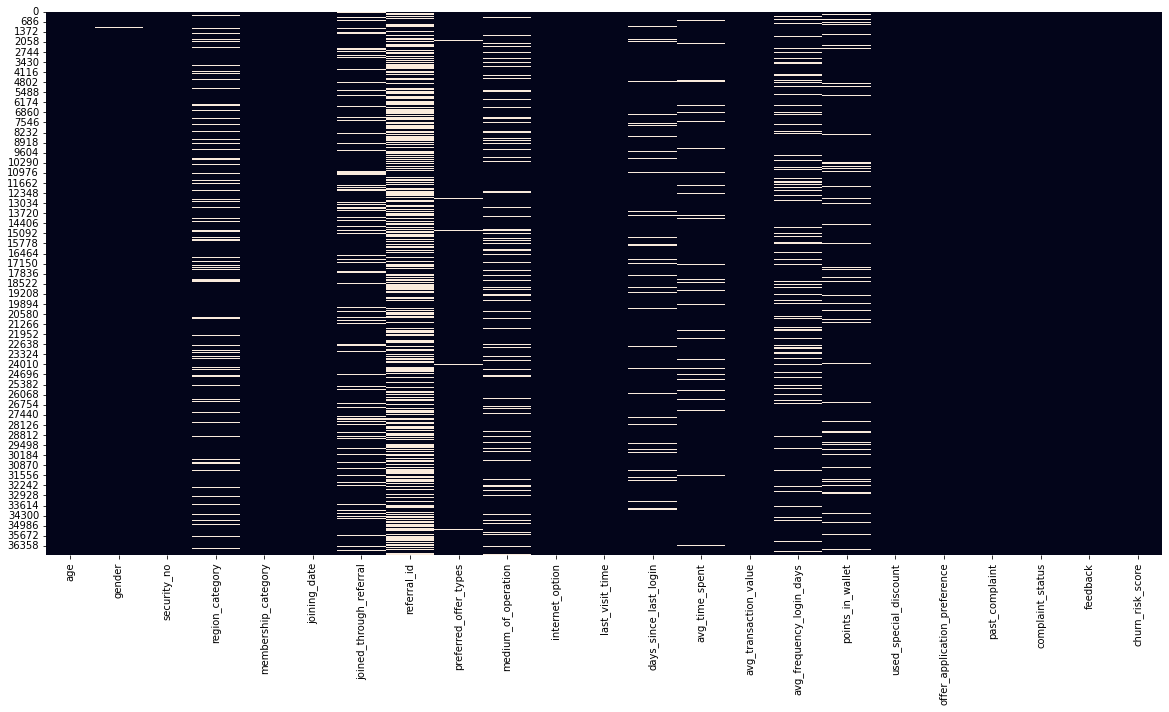

In [33]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isnull(), cbar=False)
plt.show()

###  5.1.3 Missing values imputation <a id='impute'></a>

In [34]:
df_num = data.select_dtypes(include=np.number)
df_cat = data.select_dtypes(include='object')

**Missing values treatment for categorical variable**

In [35]:
Missing_cat = data[['gender','preferred_offer_types','region_category','joined_through_referral','medium_of_operation']]
for i,col in enumerate(Missing_cat):
    data[col].fillna(data[col].mode()[0], inplace=True)

**Missing values treatment for numerical variable**

In [36]:
Missing_num = data[['points_in_wallet','avg_time_spent','days_since_last_login','avg_frequency_login_days']]

In [37]:
imputer = KNNImputer(n_neighbors=3)
imputed_value=imputer.fit_transform(Missing_num)

1. For imputing missing values for categorical features we have used mode value
2. For imputing missing values for numerical featurers we have used `KNNimputer` after experimenting with other imputation methods such as `mean` & `median` and we got better results with KNNimputer.

In [38]:
d1 = pd.DataFrame({
    'avg_frequency_login_days':imputed_value.T[0],
    'points_in_wallet':imputed_value.T[1],
    'days_since_last_login':imputed_value.T[2],
    'avg_time_spent':imputed_value.T[3]

})

data.drop(['avg_frequency_login_days','points_in_wallet','days_since_last_login','avg_time_spent'], axis=1, inplace=True)

data = pd.concat([data, d1], axis=1)

### 5.2 Duplicate Data  <a id='duplicate'></a>

In [39]:
data[data.duplicated()]

,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,...,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,avg_frequency_login_days,points_in_wallet,days_since_last_login,avg_time_spent


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
There is no duplication in dataset.                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>



## 5.3 Feature Engineering  <a id='feature_eng'></a>

In [40]:
data['year']=data.joining_date.apply(lambda x:2021-int(x.split('-')[0]))

In [41]:
data.drop(['security_no','joining_date','referral_id','last_visit_time'], axis=1, inplace=True)

1. Created new feature `year` from joining_date 
2. Dropped features such as security_no, referral_id etc. because either they aren't valuable for predicting churn or having major missing values.

## 5.4 Outliers <a id='out'></a>

### 5.4.1 Discovery of Outliers <a id='dis_out'></a>

In [42]:
df_num=data.select_dtypes(include=[np.number]) 

In [43]:
Q1 = data.quantile(0.25) 
Q3 = data.quantile(0.75) 
IQR = Q3 - Q1 

outlier = pd.DataFrame((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))
for i in outlier.columns:
    print(f'Total number of Outliers in column {i} are {len(outlier[outlier[i] == True][i])}')

Total number of Outliers in column age are 0
Total number of Outliers in column avg_transaction_value are 1131
Total number of Outliers in column churn_risk_score are 0
Total number of Outliers in column avg_frequency_login_days are 4399
Total number of Outliers in column points_in_wallet are 2911
Total number of Outliers in column days_since_last_login are 0
Total number of Outliers in column avg_time_spent are 417
Total number of Outliers in column year are 0


### 5.4.2 Visualizing outliers using Boxplots <a id='viz'></a>

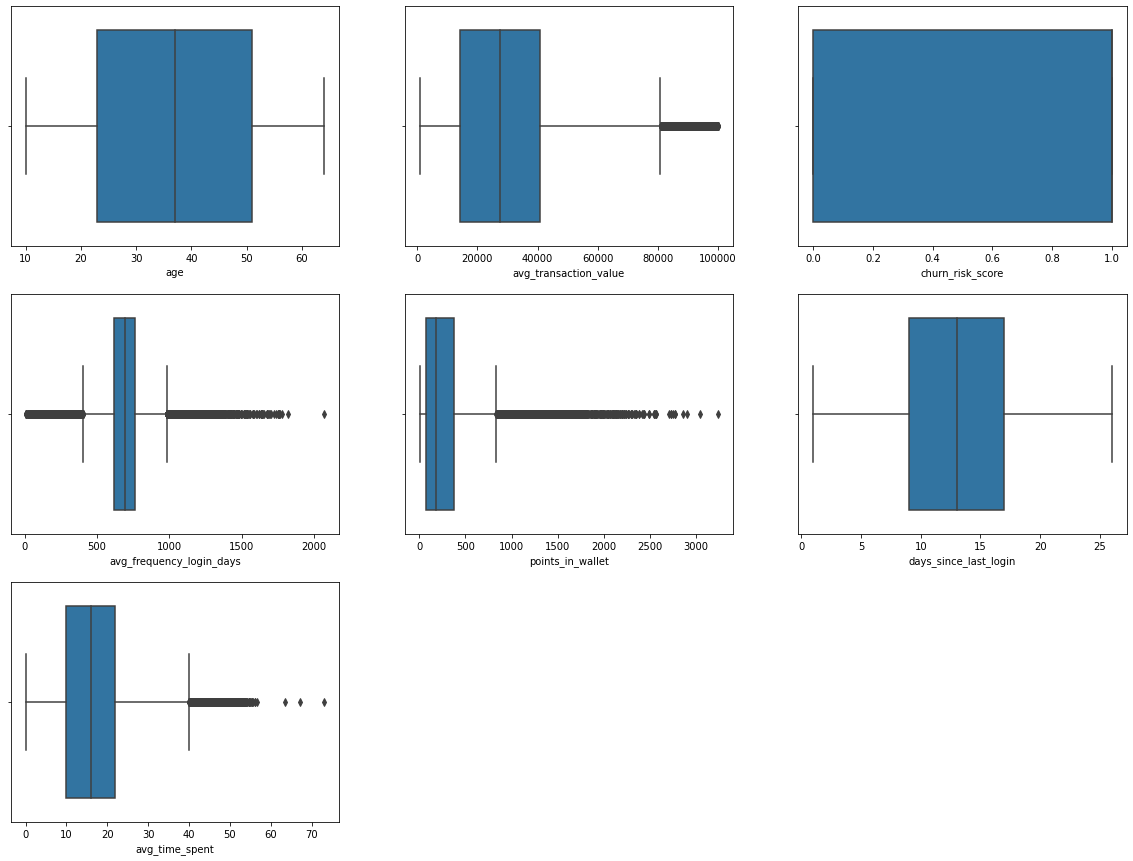

In [44]:
fig,ax= plt.subplots(nrows=3,ncols=3,figsize=(20, 15)) 
for variable, subplot in zip(df_num.columns,ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)
    
fig.delaxes(ax[2][1])
fig.delaxes(ax[2][2])
plt.show()

1. Features such as `age`, `day_since_last_login` have no outliers
2. `points in wallet` and `avg frequency login days` are having outliers in large numbers, which will be treated in next section

### 5.4.3 Removal of Outliers <a id='rem_out'></a>

In [45]:
data_iqr = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] 

data_iqr.reset_index(inplace=True)

data_iqr.drop('index',axis=1, inplace=True)

In [46]:
df_cat = data_iqr[['gender','region_category','joined_through_referral','preferred_offer_types','medium_of_operation','internet_option','used_special_discount','offer_application_preference','past_complaint']]
df_num = data_iqr.select_dtypes(include=np.number)

## 5.5 Categorical Data Encoding  <a id='cat_enc'></a>

In [47]:
orderencoding_membership_category = OrdinalEncoder(categories = [["No Membership", "Basic Membership", "Silver Membership", "Gold Membership","Platinum Membership","Premium Membership"]])
data_iqr['membership_category'] = orderencoding_membership_category.fit_transform(data_iqr['membership_category'].values.reshape(-1,1))

orderencoding_complaint_status = OrdinalEncoder(categories = [["No Information Available", "Not Applicable", "Unsolved","Solved","Solved in Follow-up"]])
data_iqr['complaint_status'] = orderencoding_complaint_status.fit_transform(data_iqr['complaint_status'].values.reshape(-1,1)) 

labelencoder_feedback = LabelEncoder() 
data_iqr['feedback'] = labelencoder_feedback.fit_transform(data_iqr.feedback) 

df_categorical = pd.get_dummies(df_cat, drop_first=True)

1. For features such as `membership_category` and `complaint_status` we have used **OrdinalEncoder** because there is kind hierarchy in which we can order classes of these features.
2. We have used dummy encoded features such as age, region, medium_of_operation, and internet_option etc.

In [48]:
df_final = pd.concat([df_categorical,df_num,data_iqr['membership_category'],data_iqr['complaint_status'],data_iqr['feedback']], axis=1)

## 5.6 Feature Scaling  <a id='fea_sca'></a>

In [49]:
col = df_final[['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet']]

In [50]:
df_final.drop(['age','days_since_last_login','avg_time_spent','avg_transaction_value','avg_frequency_login_days','points_in_wallet'], axis=1, inplace=True)

In [51]:
standard_scale = StandardScaler() 
col1 = standard_scale.fit_transform(col) 
df_scaled = pd.DataFrame(col1, columns=col.columns)

In [52]:
df_scaled.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,-1.209342,0.756268,0.098431,1.566300,1.032977,0.435508
1,-0.326297,0.573495,-0.849870,-0.883072,-1.090570,0.465956
2,0.430599,0.207949,0.775788,-0.383731,-1.992103,1.584823
3,-0.010923,-0.340370,-1.391756,-0.126849,-1.271298,-0.883541
4,-0.389371,1.304586,-0.037041,-0.172944,-0.244497,-0.564337


In [53]:
data_final = pd.concat([df_final,df_scaled], axis=1 )

In [54]:
data_final.head()

,gender_M,region_category_Town,region_category_Village,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,...,year,membership_category,complaint_status,feedback,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
0,0,0,1,0,1,0,1,0,0,1,...,4,4.0,1.0,4,-1.209342,0.756268,0.098431,1.566300,1.032977,0.435508
1,0,0,0,0,1,0,1,0,1,0,...,4,5.0,3.0,5,-0.326297,0.573495,-0.849870,-0.883072,-1.090570,0.465956
2,0,1,0,1,1,0,1,0,0,1,...,5,0.0,4.0,3,0.430599,0.207949,0.775788,-0.383731,-1.992103,1.584823
3,1,0,0,1,1,0,1,0,1,0,...,5,0.0,2.0,3,-0.010923,-0.340370,-1.391756,-0.126849,-1.271298,-0.883541
4,0,0,0,0,0,0,0,1,1,0,...,4,0.0,3.0,3,-0.389371,1.304586,-0.037041,-0.172944,-0.244497,-0.564337


# 6. Model Evaluation <a id='eval'></a> 

## 6.1 Feature Selection using Random Forest  <a id='fea_sel'></a> 

In [55]:
Features = data_final.drop(['churn_risk_score'] ,axis = 1)
Target = data_final['churn_risk_score']

In [56]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(Features, Target, test_size=0.20, random_state=42)

model =  RandomForestClassifier(random_state = 0)
model.fit(X_train1, y_train1)

RandomForestClassifier(random_state=0)

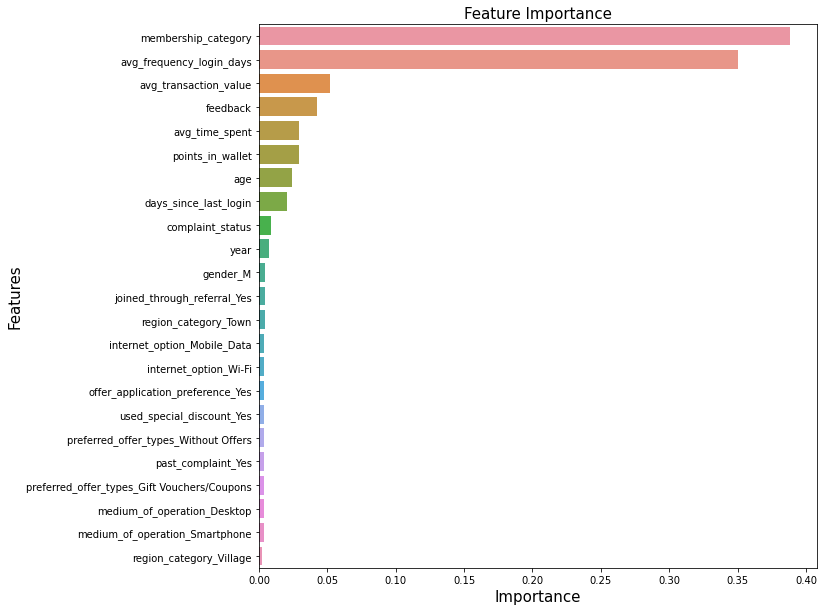

In [57]:
important_features = pd.DataFrame({'Features': X_train1.columns, 
                                   'Importance': model.feature_importances_})

important_features = important_features.sort_values('Importance', ascending = False)

sns.barplot(x = 'Importance', y = 'Features', data = important_features)

plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)

plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                      Important features are identified using Random Forest and dropping inconsistent features.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
X = Features.drop(['region_category_Village',
                       'offer_application_preference_Yes',
                       'used_special_discount_Yes',
                       'preferred_offer_types_Gift Vouchers/Coupons',
                       'past_complaint_Yes',
                       'preferred_offer_types_Without Offers',
                       'medium_of_operation_Smartphone',
                       'medium_of_operation_Desktop',
                       'internet_option_Wi-Fi',
                       'internet_option_Mobile_Data',
                       'joined_through_referral_Yes',
                       'region_category_Town',
                      ], axis =1)
y = Target

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## 6.2 Grid Search CV <a id='grid'></a> 

In [60]:
def gridsearch(model , param):
    gscv = GridSearchCV(estimator = model, 
                         param_grid = param, 
                         scoring='accuracy',
                         cv = 5,
                         n_jobs = -1)
    gscv.fit(X_train , y_train)
    result = gscv.best_params_
    return result

In [61]:
knn_gs = KNeighborsClassifier()
knn_params ={'n_neighbors':[3,5,7,9,11]}
r2 = gridsearch(knn_gs , knn_params)
print(f'Best parameters for KNN: {r2}')

Best parameters for KNN: {'n_neighbors': 11}


In [62]:
rf_gs = RandomForestClassifier(random_state = 0)
rf_params = {
  'n_estimators':[200,300],
 'criterion': ( 'gini','entropy'),
 'max_depth': [2, 3 ,4],
 'min_samples_split': [2, 9],
 'max_features': ("sqrt", "log2") }
r3 = gridsearch(rf_gs , rf_params)
print(f'Best parameters for Random Forest :{r3}')

Best parameters for Random Forest :{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 300}


In [63]:
ab_gs = AdaBoostClassifier(random_state = 0)
ab_params ={
            'n_estimators':[10,250,1000],
             'learning_rate':[0.01,0.1]
            }
r4 = gridsearch(ab_gs , ab_params)
print(f'Best parameters for AdaBoost :{r4}')

Best parameters for AdaBoost :{'learning_rate': 0.01, 'n_estimators': 250}


In [64]:
xgb_gs =  XGBClassifier(random_state = 0, verbosity = 0)
xgb_params =  {'n_estimators':[100,300],
              'learning_rate':[0.1,0.2]} 
r5 = gridsearch(xgb_gs , xgb_params)
print(f'Best parameters for XGBoost :{r5}')

Best parameters for XGBoost :{'learning_rate': 0.1, 'n_estimators': 100}


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>
                      Best hyperparameters are identified using Grid Search CV.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## 6.3 Kfold Cross Validation  <a id='kfold'></a> 

In [65]:
def kfcv(model , x , y):
    accuracies = cross_val_score(estimator = model, X = x, y = y, cv = 10, n_jobs = -1)
    return accuracies

In [66]:
lr_kf  = LogisticRegression(random_state=0, penalty = 'l2')
nb_kf  = GaussianNB()
knn_kf = KNeighborsClassifier(n_neighbors= 11)
rf_kf  = RandomForestClassifier(max_depth=3, random_state=0 , criterion= 'gini' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 300)
ab_kf  = AdaBoostClassifier(n_estimators=250, learning_rate = 0.01, random_state=0)
xgb_kf = XGBClassifier(random_state= 0 , learning_rate= 0.1 , n_estimators= 100)

**Accuracies for all base models.**

In [67]:
accuracies = kfcv(lr_kf , X , y)
print(f'Logistic Regression: \n Mean Accuracy {accuracies.mean()} \n Minimum Accuracy {accuracies.min()} \n Maximum Accuracy {accuracies.max()} \n Accuracies: {accuracies}')

Logistic Regression: 
 Mean Accuracy 0.8580606825647228 
 Minimum Accuracy 0.843239485575252 
 Maximum Accuracy 0.8679638637943016 
 Accuracies: [0.85892981 0.86796386 0.86726894 0.86096628 0.84323949 0.85123392
 0.84914842 0.85888078 0.86652763 0.85644769]


In [68]:
accuracies1 = kfcv(nb_kf , X , y)
print(f'Naive Bayes : \n Mean Accuracy {accuracies1.mean()} \n Minimum Accuracy {accuracies1.min()} \n Maximum Accuracy {accuracies1.max()} \n Accuracies: {accuracies1}')

Naive Bayes : 
 Mean Accuracy 0.8628915123974549 
 Minimum Accuracy 0.848800834202294 
 Maximum Accuracy 0.872133425990271 
 Accuracies: [0.86831133 0.87074357 0.87213343 0.86791797 0.84880083 0.85331943
 0.85436218 0.86235662 0.86896072 0.86200904]


In [69]:
accuracies2 = kfcv(knn_kf , X , y) 
print(f'KNN: \n Mean Accuracy {accuracies2.mean()} \n Minimum Accuracy {accuracies2.min()} \n Maximum Accuracy {accuracies2.max()} \n Accuracies: {accuracies2}')

KNN: 
 Mean Accuracy 0.9102975770790505 
 Minimum Accuracy 0.899895724713243 
 Maximum Accuracy 0.9134815844336345 
 Accuracies: [0.91278666 0.91243919 0.91348158 0.91171359 0.91275634 0.90997567
 0.90858533 0.9092805  0.91206117 0.89989572]


In [70]:
accuracies3 = kfcv(rf_kf , X , y)
print(f'Random Forest: \n Mean Accuracy {accuracies3.mean()} \n Minimum Accuracy {accuracies3.min()} \n Maximum Accuracy {accuracies3.max()} \n Accuracies: {accuracies3}')

Random Forest: 
 Mean Accuracy 0.9328883215785109 
 Minimum Accuracy 0.9249217935349322 
 Maximum Accuracy 0.9416058394160584 
 Accuracies: [0.93259208 0.93537179 0.93502432 0.93569691 0.92944039 0.92492179
 0.93222106 0.92978797 0.94160584 0.93222106]


In [71]:
accuracies4 = kfcv(ab_kf , X , y) 
print(f'AdaBoost: \n Mean Accuracy {accuracies4.mean()} \n Minimum Accuracy {accuracies4.min()} \n Maximum Accuracy {accuracies4.max()} \n Accuracies: {accuracies4}')

AdaBoost: 
 Mean Accuracy 0.9299341449752573 
 Minimum Accuracy 0.9221411192214112 
 Maximum Accuracy 0.9381299965241571 
 Accuracies: [0.92981237 0.93259208 0.93224461 0.9336114  0.92526938 0.92214112
 0.93013556 0.92631213 0.93813    0.92909281]


In [72]:
accuracies5 = kfcv(xgb_kf , X , y)
print(f'XGBoost: \n Mean Accuracy {accuracies5.mean()} \n Minimum Accuracy {accuracies5.min()} \n Maximum Accuracy {accuracies5.max()} \n Accuracies: {accuracies5}')

XGBoost: 
 Mean Accuracy 0.941298967657753 
 Minimum Accuracy 0.9339589850538755 
 Maximum Accuracy 0.9454482279360668 
 Accuracies: [0.93849896 0.9447533  0.94544823 0.94542927 0.94125826 0.9402155
 0.93778241 0.93395899 0.94334376 0.94230101]


## 6.4 Defining Functions<a id='fun'></a>

Helper Functions

In [ ]:
plt.rcParams['figure.figsize'] = [9,8]

### 6.4.1 Confusion Matrix <a id='matrix'></a>

In [141]:
def confusion_matrix_plot(model):
    ypred = model.predict(X_test)
    cm = confusion_matrix(y_test, ypred)
    cm = np.rot90(cm , 2)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:1','Predicted:0'], index = ['Actual:1','Actual:0'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cbar = False, 
                linewidths = 0.1, annot_kws = {'size':20})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

### 6.4.2 ROC Curve <a id='roc'></a>

In [74]:
def roc_plot(model):
    y_pred_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.plot([0, 1], [0, 1],'r--')
    plt.title('ROC curve', fontsize = 15)
    plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
    plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
    plt.text(x = 0.02, y = 0.9, s = ('AUC Score:',round(roc_auc_score(y_test, y_pred_prob),4)))
    plt.grid(True)

### 6.4.3 Classification Report <a id='report'></a>

In [75]:
def creport(model):
    ypred = model.predict(X_test)
    cr = classification_report(y_test, ypred)
    return cr

### 6.4.4 Accuracy <a id='accuracy'></a>

In [76]:
def accuracy(y_test , ypred):
    auc = accuracy_score(y_test , ypred)
    return auc

### 6.4.5 F1 Score <a id='f1'></a>

In [77]:
def f1(y_test , ypred):
    f = f1_score(y_test, ypred, average='macro')
    return f

# 7. Model Building <a id='bui_mod'></a>

## 7.1 Logistic Regression <a id='logreg'></a>

In [78]:
logistic_model = LogisticRegression(random_state=0, penalty = 'l2')
logistic_model.fit(X_train,y_train)

LogisticRegression(random_state=0)

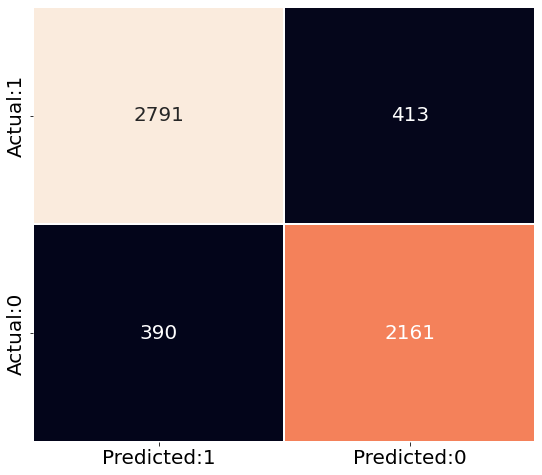

In [85]:
confusion_matrix_plot(logistic_model)

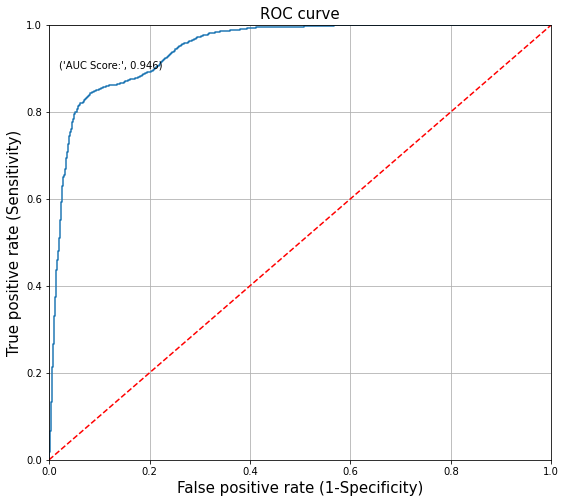

In [86]:
roc_plot(logistic_model)

In [87]:
print(creport(logistic_model))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2551
           1       0.88      0.87      0.87      3204

    accuracy                           0.86      5755
   macro avg       0.86      0.86      0.86      5755
weighted avg       0.86      0.86      0.86      5755



## 7.2 Naive Bayes   <a id='bayes'></a>

In [88]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

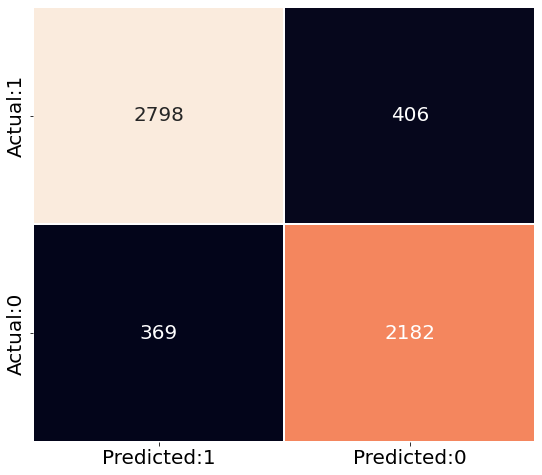

In [89]:
confusion_matrix_plot(gnb)

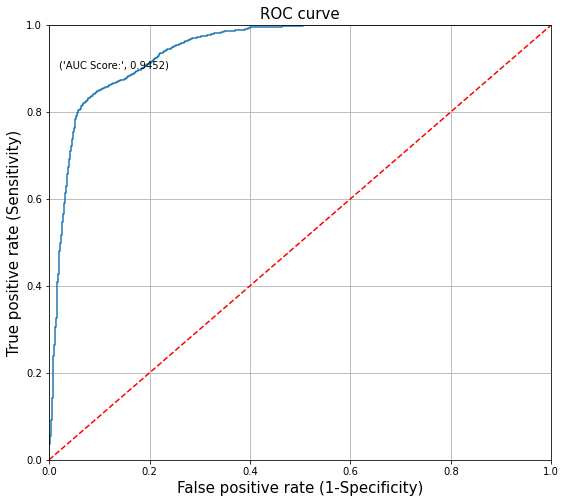

In [90]:
roc_plot(gnb)

In [91]:
print(creport(gnb))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      2551
           1       0.88      0.87      0.88      3204

    accuracy                           0.87      5755
   macro avg       0.86      0.86      0.86      5755
weighted avg       0.87      0.87      0.87      5755



## 7.3 K nearest neighbors (KNN)   <a id='knn'></a>

In [92]:
knn = KNeighborsClassifier(n_neighbors= 11)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

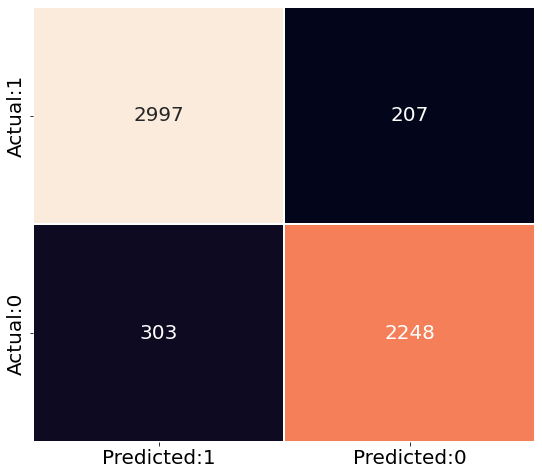

In [93]:
confusion_matrix_plot(knn)

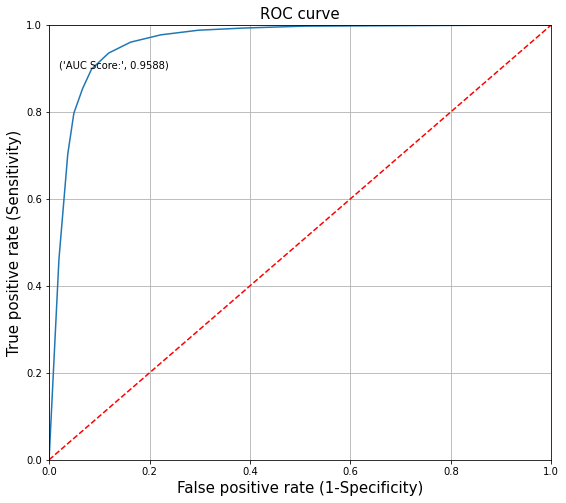

In [94]:
roc_plot(knn)

In [95]:
print(creport(knn))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      2551
           1       0.91      0.94      0.92      3204

    accuracy                           0.91      5755
   macro avg       0.91      0.91      0.91      5755
weighted avg       0.91      0.91      0.91      5755



## 7.4 Random Forest <a id='forest'></a>

In [96]:
rf = RandomForestClassifier(max_depth=3, random_state=0 , criterion= 'gini' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 300)
rf.fit(X_train , y_train)

RandomForestClassifier(max_depth=3, max_features='sqrt', n_estimators=300,
                       random_state=0)

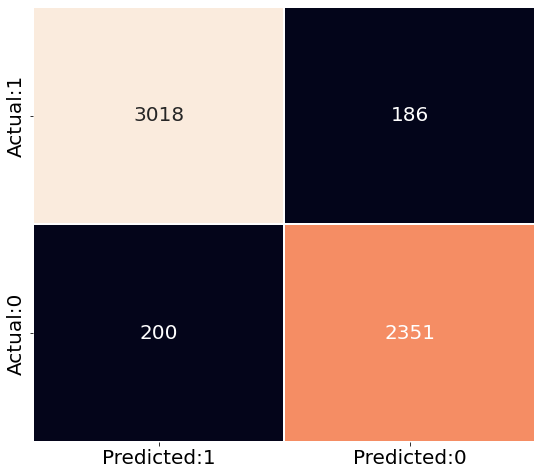

In [97]:
confusion_matrix_plot(rf)

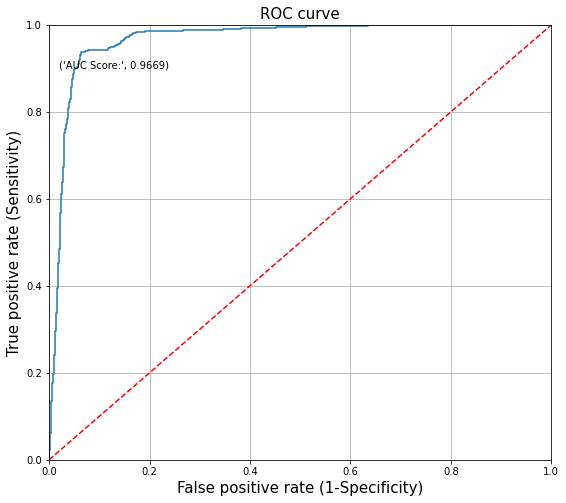

In [98]:
roc_plot(rf)

In [99]:
print(creport(rf))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      2551
           1       0.94      0.94      0.94      3204

    accuracy                           0.93      5755
   macro avg       0.93      0.93      0.93      5755
weighted avg       0.93      0.93      0.93      5755



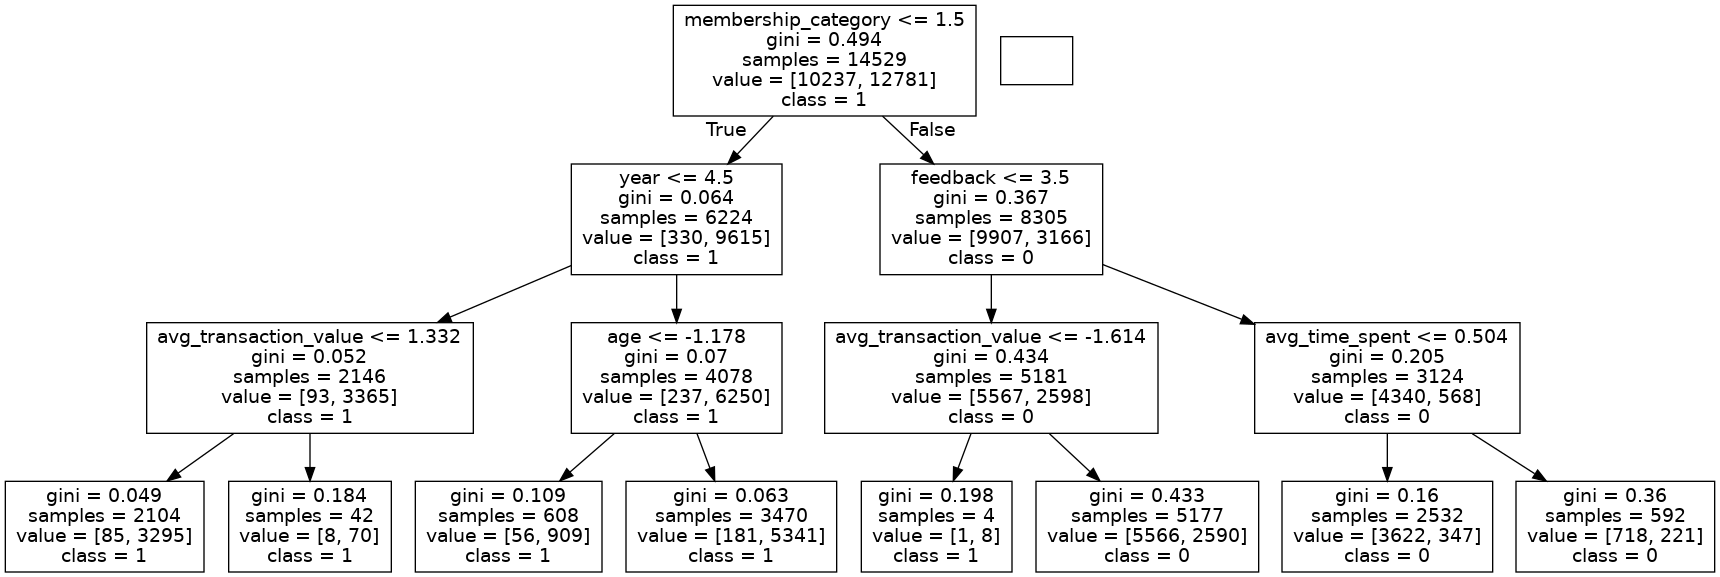

In [100]:
labels = X_train.columns
dot_data = tree.export_graphviz(rf[0], feature_names = labels, class_names = ["0","1"])  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

## 7.5 AdaBoost <a id='adaboost'></a>

In [106]:
ab = AdaBoostClassifier(n_estimators=250, learning_rate = 0.01, random_state=0)
ab.fit(X_train , y_train)

AdaBoostClassifier(learning_rate=0.01, n_estimators=250, random_state=0)

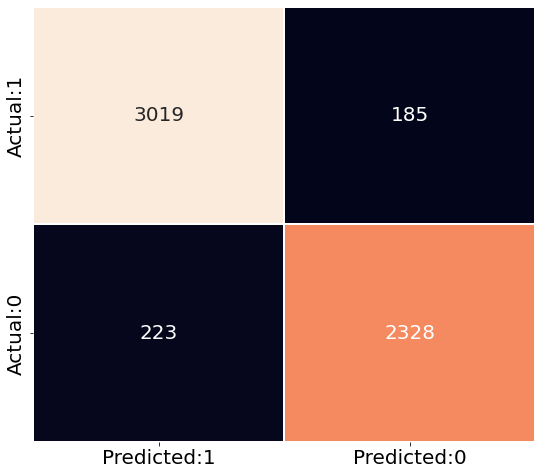

In [107]:
confusion_matrix_plot(ab)

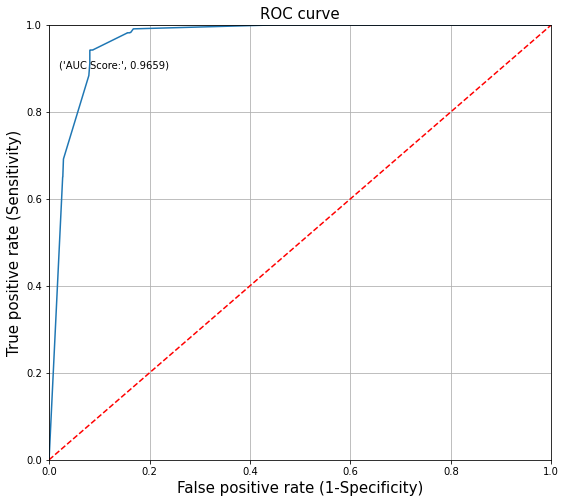

In [103]:
roc_plot(ab)

In [108]:
print(creport(ab))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      2551
           1       0.93      0.94      0.94      3204

    accuracy                           0.93      5755
   macro avg       0.93      0.93      0.93      5755
weighted avg       0.93      0.93      0.93      5755



## 7.6 XGBoost  <a id='xgboost'></a>

In [109]:
xgb = XGBClassifier(random_state= 0 , learning_rate= 0.2, n_estimators= 100, verbosity = 0)
xgb.fit(X_train , y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

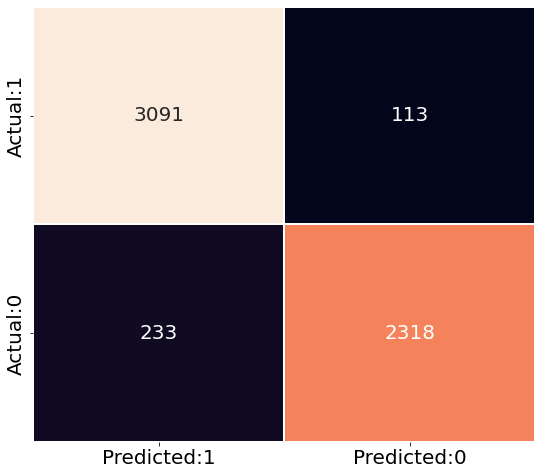

In [110]:
confusion_matrix_plot(xgb)

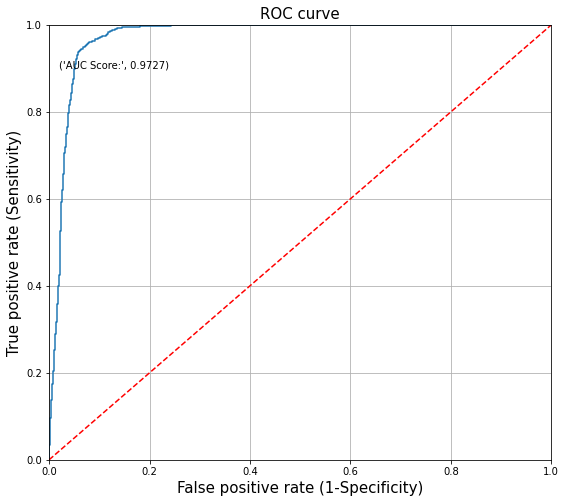

In [111]:
roc_plot(xgb)

# 8. Model Performance <a id='mod_per'></a>

**Comparison of Different Models**

Training Set Predictions

In [113]:
y_predtr = logistic_model.predict(X_train)
y_pred1tr = gnb.predict(X_train)
y_pred2tr = knn.predict(X_train)
y_pred3tr = rf.predict(X_train)
y_pred4tr = ab.predict(X_train)
y_pred5tr = xgb.predict(X_train)

Test Set Predictions

In [114]:
y_pred = logistic_model.predict(X_test)
y_pred1 = gnb.predict(X_test)
y_pred2 = knn.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = ab.predict(X_test)
y_pred5 = xgb.predict(X_test)

In [115]:
# Comparison of Different Models wrt Performance Metrics

comp = pd.DataFrame({'Model':['Logistic Regression','Naive Bayes','KNN','Random Forest','AdaBoost','XGBoost'],
                    'Train Accuracy':[accuracy(y_train,y_predtr), accuracy(y_train,y_pred1tr), accuracy(y_train,y_pred2tr), accuracy(y_train,y_pred3tr),
                                      accuracy(y_train,y_pred4tr), accuracy(y_train,y_pred5tr)],
                    'Test Accuracy':[accuracy(y_test,y_pred), accuracy(y_test,y_pred1), accuracy(y_test,y_pred2), accuracy(y_test,y_pred3),
                                      accuracy(y_test,y_pred4), accuracy(y_test,y_pred5)],
                    'Test f1-Score':[f1(y_test,y_pred), f1(y_test,y_pred1), f1(y_test,y_pred2), f1(y_test,y_pred3),
                                      f1(y_test,y_pred4), f1(y_test,y_pred5)]}
                    )

print(comp)

                 Model  Train Accuracy  Test Accuracy  Test f1-Score
0  Logistic Regression        0.857894       0.860469       0.858777
1          Naive Bayes        0.862977       0.865334       0.863774
2                  KNN        0.926883       0.911381       0.909854
3        Random Forest        0.933313       0.932928       0.932015
4             AdaBoost        0.930272       0.929105       0.928068
5              XGBoost        0.966722       0.939878       0.938774


# 9. Model Ensembling  <a id='mod_opt'></a>

## 9.2 Voting Classifier  <a id='vote'></a>

In [116]:
clf1 = KNeighborsClassifier(n_neighbors= 11)
clf2 = RandomForestClassifier(max_depth=4, random_state=0 , criterion= 'entropy' , max_features='sqrt' , min_samples_split= 2 , n_estimators= 300)
clf3 = AdaBoostClassifier(n_estimators=250, learning_rate = 0.01,random_state=0)
vclf = VotingClassifier(estimators=[('KNN', clf1), ('Random_Forest', clf2), ('AdaBoost' , clf3)],
                                   voting='soft')

## 9.3 Stacking Classifier   <a id='stack'></a>

In [117]:
estimators = [('Voting Classifier' , vclf),
              ('XGBoost', XGBClassifier(random_state= 0 , learning_rate= 0.2 , n_estimators= 100, verbosity = 0) )]

stackclf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(random_state= 0))

In [118]:
stackclf.fit(X_train ,y_train)

StackingClassifier(estimators=[('Voting Classifier',
                                VotingClassifier(estimators=[('KNN',
                                                              KNeighborsClassifier(n_neighbors=11)),
                                                             ('Random_Forest',
                                                              RandomForestClassifier(criterion='entropy',
                                                                                     max_depth=4,
                                                                                     max_features='sqrt',
                                                                                     n_estimators=300,
                                                                                     random_state=0)),
                                                             ('AdaBoost',
                                                              AdaBoostClassifier(learning_rate=0.01,
       

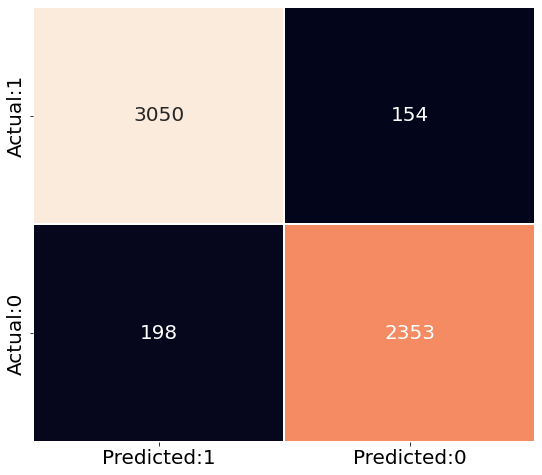

In [119]:
confusion_matrix_plot(stackclf)

In [120]:
y_pred6tr = stackclf.predict(X_train)
y_pred6 = stackclf.predict(X_test)

# 10 Displaying Score Summary   <a id='dis_sco_sum'></a>

In [121]:
comp1 = pd.DataFrame({'Model':['Final Model'],
                      'Train Accuracy':[accuracy(y_train,y_pred6tr)],
                      'Test Accuracy':[accuracy(y_test,y_pred6)],
                      'Test f1-Score':[f1(y_test , y_pred6)]}
                      )
final_comp = pd.concat([comp, comp1], axis = 0)

In [127]:
final_comp.reset_index(drop=True, inplace=True)

final_comp.style.highlight_max(color = 'lightblue', subset = 'Test Accuracy'

,Model,Train Accuracy,Test Accuracy,Test f1-Score
0,Logistic Regression,0.857894,0.860469,0.858777
1,Naive Bayes,0.862977,0.865334,0.863774
2,KNN,0.926883,0.911381,0.909854
3,Random Forest,0.933313,0.932928,0.932015
4,AdaBoost,0.930272,0.929105,0.928068
5,XGBoost,0.966722,0.939878,0.938774
6,Final Model,0.961074,0.938836,0.937925


**Conclusion**


1. Even though Xgboost is giving good Test Accuracy overall but we need to focus on the customers who are leaving i.e. 1, so that we can retain them with some discount offer on membership,  

2. Emsemble methods (stack classifier) is having 94% of recall for predicting the customer who are likely to leave higher than Xgboost.

                                                        --------- The End ---------